# Titanic Survivors - Data Visualization with Pandas and Seaborn
Original dataset can be found [here](https://www.kaggle.com/c/titanic/data). I am using the training data (train.csv).

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

data = pd.read_csv("data/titanic.csv")

Let's take a look at our dataframe

In [ ]:
data.head()

Firstly, we'll show the relationship between the number of survivors and gender and travel classes

/home/korpog/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Number of Titanic survivors by class and sex')

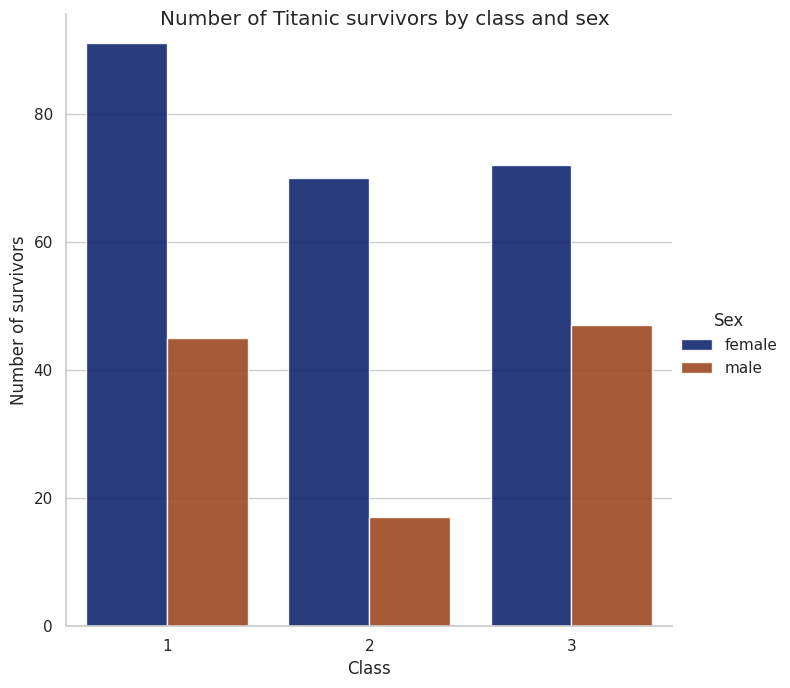

In [4]:
dta = data.groupby(["Sex", "Pclass"], as_index=False)["Survived"].sum()

g = sns.catplot(
    data=dta, kind="bar",
    x="Pclass", y="Survived", hue="Sex", 
    palette="dark", alpha=.9, height=7
)
g.set_axis_labels("Class", "Number of survivors")
g.fig.suptitle("Number of Titanic survivors by class and sex")